In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize,LabelEncoder
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer,ConfusionMatrixDisplay
%matplotlib inline


In [2]:
df = pd.read_csv('ps4_clean.csv', header=0, sep=',') 
df.drop(['name','release'],axis=1,inplace=True)
label_cols=['genres','developer','publisher']

for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [3]:
y=df['is_best']
X=df.drop('is_best',axis=1)

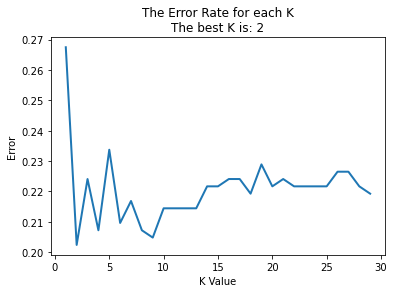

In [4]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)
k_errors=[]
best_k=[]
for k in range(1,30):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    best_k.append(k)
    k_errors.append(np.mean(y_pred !=y_test))
plt.plot(range(1, 30), k_errors,linewidth=2)
plt.xlabel('K Value')
plt.ylabel('Error')
plt.title('The Error Rate for each K\nThe best K is: {best}'.format(best=best_k[k_errors.index(min(k_errors))]))
plt.show()



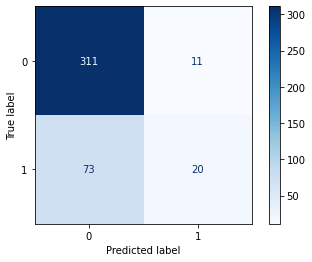

Accuracy = 0.7975903614457831
Precision = 0.6451612903225806
Recall = 0.21505376344086022
F1 = 0.3225806451612903


In [7]:
knn=KNeighborsClassifier(n_neighbors=best_k[k_errors.index(min(k_errors))])
knn.fit(X_train, y_train) 
pred = knn.predict(X_test) 
cm=confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()
print('Accuracy =',metrics.accuracy_score(y_true = y_test, y_pred = pred))
print('Precision =',metrics.precision_score(y_true = y_test, y_pred = pred))
print('Recall =',metrics.recall_score(y_true = y_test, y_pred = pred))
print('F1 =',metrics.f1_score(y_true = y_test, y_pred = pred))